# Librerías a utilizar en el proyecto 

In [68]:
#Librerias para procesar datos
import pandas as pd
from datetime import datetime



In [69]:
from funciones import multiple_plot, plot_roc_curve, tidy_corr_matrix, checkVIF


In [70]:
#Funciones 
def limpieza_datos(url_dataset, fila_final, columna_final):
    """ 
    Lee el excel y se encarga de extraer la información valiosa
    Parametros:
        url_dataset - text: dirección donde se encuentra en archivo con datos en github
        columna_final - int: la última columna que contiene datos en el archivo
        fila_final - int: la última fila que contiene datos en el archivo
    retorna: 
        DataFrame
    """ 
    df = pd.read_excel(url_dataset)
    xdf = df.iloc[15:fila_final,2:columna_final]
    xdf.iloc[0,0] = "date"
    xdf_sin_nan = xdf.dropna(how='all')
    xdf_sin_nan = xdf.dropna(axis=1)
    nuevos_nombres_columnas =  list(xdf_sin_nan.iloc[0])
    xdf_sin_nan.columns = nuevos_nombres_columnas
    xdf_sin_nan = xdf_sin_nan.reset_index(drop=True)
    xdf_sin_nan = xdf_sin_nan.drop(0)
    xdf_sin_nan = xdf_sin_nan.reset_index(drop=True)
    return xdf_sin_nan


def limpieza_datos_2023(url_dataset, fila_final, columna_final):
    df = pd.read_excel(url_dataset)
    xdf = df.iloc[15:fila_final,2:columna_final]
    xdf.iloc[0,0] = "date"
    rows_with_nan = xdf[xdf.isna().any(axis=1)]
    if not(rows_with_nan.shape == (0,0)):
        xdf_sin_nan = xdf.dropna(how='all')
    xdf_sin_nan = xdf_sin_nan.dropna(axis=1)
    nuevos_nombres_columnas =  list(xdf_sin_nan.iloc[0])
    xdf_sin_nan.columns = nuevos_nombres_columnas
    xdf_sin_nan = xdf_sin_nan.reset_index(drop=True)
    xdf_sin_nan = xdf_sin_nan.drop(0)
    xdf_sin_nan = xdf_sin_nan.reset_index(drop=True)
    return xdf_sin_nan
    
def convert_to_datetime(column):
    formats = ['%Y-%m-%dT%H:%M:%S.%f', '%Y-%m-%dT%H:%M:%S,%f']
    for fmt in formats:
        try:
            return pd.to_datetime(column, format=fmt)
        except ValueError:
            continue
    raise ValueError(f"Time data '{column}' does not match any known formats")

## Carga de los datos

In [71]:
#Enlaces de los archivos de energia_activa_2020 hasta 2023 y la información captada por sensores

urls_epm = {
    'energia_activa_2020':'https://github.com/Causil/especializacion/raw/main/monografia/momentos_evaluativos/Momento%203/datos_originales/Energia%20Activa%202020.xlsx',
    'energia_activa_2021':'https://github.com/Causil/especializacion/raw/main/monografia/momentos_evaluativos/Momento%203/datos_originales/Energia%20activa%202021.xlsx',
    'energia_activa_2022':'https://github.com/Causil/especializacion/raw/main/monografia/momentos_evaluativos/Momento%203/datos_originales/Energia%20activa%202022.xlsx',
    'energia_activa_2023':'https://github.com/Causil/especializacion/raw/main/monografia/momentos_evaluativos/Momento%203/datos_originales/Energ%C3%ADa%20Activa%202023.xlsx'
}

urls_sensores = {
    'iot_calderas'       :'https://raw.githubusercontent.com/Causil/especializacion/main/monografia/momentos_evaluativos/Momento%203/datos_originales/auralac_iot_calderas.csv',
    'iot_esterilizadores':'https://raw.githubusercontent.com/Causil/especializacion/main/monografia/momentos_evaluativos/Momento%203/datos_originales/auralac_iot_esterilizadores.csv',
    'iot_pasteurizadores':'https://raw.githubusercontent.com/Causil/especializacion/main/monografia/momentos_evaluativos/Momento%203/datos_originales/auralac_iot_pasteurizadores.csv',
    'iot_power_meters':'https://raw.githubusercontent.com/Causil/especializacion/main/monografia/momentos_evaluativos/Momento%203/datos_originales/auralac_iot_power_meters.csv',
    'iot_silos':'https://raw.githubusercontent.com/Causil/especializacion/main/monografia/momentos_evaluativos/Momento%203/datos_originales/auralac_iot_silos.csv',
    'iot_yogurteras':'https://raw.githubusercontent.com/Causil/especializacion/main/monografia/momentos_evaluativos/Momento%203/datos_originales/auralac_iot_yogurteras.csv',
}

## Limpieza de datos

In [72]:
# Eliminar celdas y espacios vacios utilizando la función limpieza_datos.
energia_activa_2020 = limpieza_datos(urls_epm["energia_activa_2020"], 336, 109)
energia_activa_2021 = limpieza_datos(urls_epm["energia_activa_2021"], 381, 109)
energia_activa_2022 = limpieza_datos(urls_epm["energia_activa_2022"], 381, 109)
energia_activa_2023 = limpieza_datos_2023(urls_epm["energia_activa_2023"], 160, 109)

# 

In [73]:
# Agrupamos y sumamos la información para que quede por días
df_reactiva_epm = pd.concat([energia_activa_2020, energia_activa_2021, energia_activa_2022, energia_activa_2023]).T.groupby(level=0).sum().T
df_reactiva_epm.columns = ["energia_activa_consumo(kWh)", "energia_activa_generación(kWh)", "energia_reactiva_capacitiva(kVarh)", "energia_reactiva_inductiva(kVarh)", "date"]
df_reactiva_epm

,energia_activa_consumo(kWh),energia_activa_generación(kWh),energia_reactiva_capacitiva(kVarh),energia_reactiva_inductiva(kVarh),date
0,4946.56,0,0,1381.8,16/02/2020
1,14396.4,0,0,7070.0,17/02/2020
2,14897.0,0,0,7641.8,18/02/2020
3,14972.6,0,0,7799.6,19/02/2020
4,16106.6,0,0,8379.0,20/02/2020
...,...,...,...,...,...
132,17486.6,0,0,10339.0,13/05/2023
133,16113.2,0,0,9334.0,14/05/2023
134,20499.6,0,0,11070.0,15/05/2023
135,21028.6,0,0,11469.0,16/05/2023


In [74]:
#Cambiando los tipos de datos a sus datos correspondientes
df_reactiva_epm['date'] = pd.to_datetime(df_reactiva_epm['date'], format='%d/%m/%Y')
type_datos = {
    'energia_activa_consumo(kWh)': 'float16',
    'energia_activa_generación(kWh)': 'float16',
    'energia_reactiva_capacitiva(kVarh)': 'float16',
    'energia_reactiva_inductiva(kVarh)': 'float16'
}
df_reactiva_epm = df_reactiva_epm.astype(type_datos)

In [75]:
# Cargamos los datos de los sensores
df_iot_calderas = pd.read_csv(urls_sensores['iot_calderas'], sep=',')
df_iot_esterilizadores = pd.read_csv(urls_sensores['iot_esterilizadores'], sep=',')
df_iot_pasteurizadores = pd.read_csv(urls_sensores['iot_pasteurizadores'], sep=',')
df_iot_power_meters = pd.read_csv(urls_sensores['iot_power_meters'], sep=',')
df_iot_silos = pd.read_csv(urls_sensores['iot_silos'], sep=',')
df_iot_yogurteras = pd.read_csv(urls_sensores['iot_yogurteras'], sep=',')

In [76]:
# Cambiando el tipo de dato de cada columna a su correspondiente tipo
for df_ in  [df_iot_calderas, df_iot_esterilizadores, df_iot_pasteurizadores, df_iot_power_meters, df_iot_silos, df_iot_yogurteras]:
    for column_id in range(len(df_.columns)):
        name_columns = df_.columns[column_id]
        if column_id == 1:
            df_[name_columns] = convert_to_datetime(df_[name_columns])
        elif column_id == 0:
            df_[name_columns] = df_[name_columns].astype(str)
        else :
            df_[name_columns] = pd.to_numeric(df_[name_columns], errors='coerce')

In [77]:
numCols = df_reactiva_epm.select_dtypes(include = ['float16']).columns.tolist()
df_reactiva_epm[numCols].head()

,energia_activa_consumo(kWh),energia_activa_generación(kWh),energia_reactiva_capacitiva(kVarh),energia_reactiva_inductiva(kVarh)
0,4948.0,0.0,0.0,1382.0
1,14400.0,0.0,0.0,7072.0
2,14896.0,0.0,0.0,7640.0
3,14976.0,0.0,0.0,7800.0
4,16104.0,0.0,0.0,8376.0


/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarnin

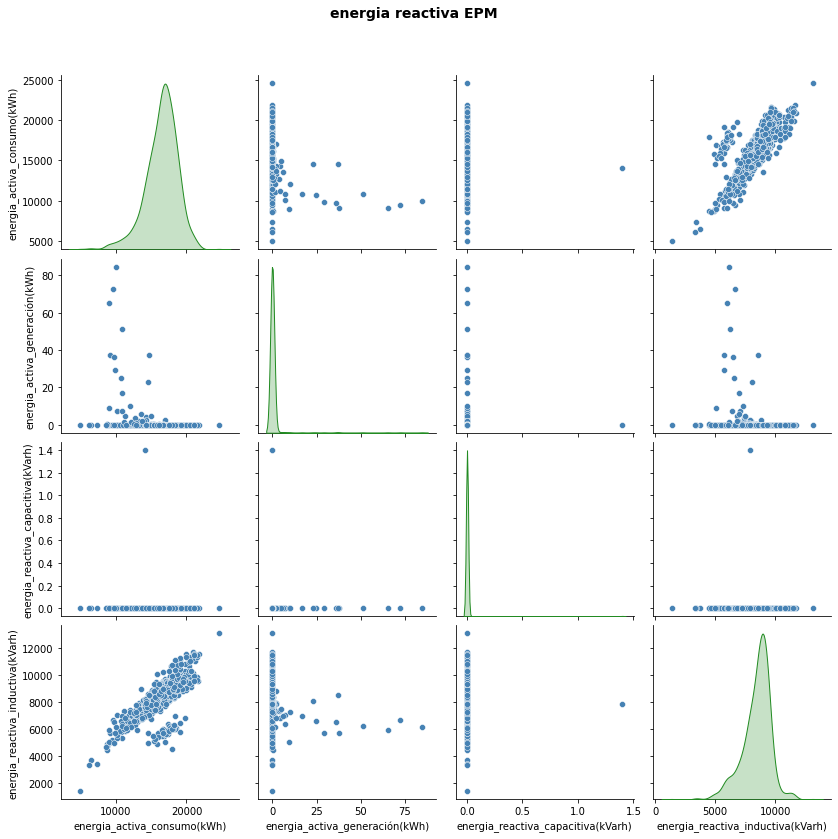

In [78]:
multiple_plot(1, df_reactiva_epm , numCols, None, 'scatterplot', 'energia reactiva EPM',30)

In [79]:
df_iot_pasteurizadores

,equipo,ts,cream_step_no,entregado_cuajada_total,entregado_leche_total,entregado_quesito_total,entregado_termizada_total,entregado_yogurt_total,lp3fit01,lp3fit041,...,plan_cuajada,plan_leche,plan_quesito,plan_termizada,plan_yogurt,recibido_fit01_cuajada,recibido_fit01_leche,recibido_fit01_quesito,recibido_fit01_termizada,recibido_fit01_yogurt
0,pasteurizador-3,2024-01-04 17:34:42.829,400,33460,2590,93245,53815,0,0,0,...,90000,200000,200000,200000,90000,33100,2280,92280,52530,0
1,pasteurizador-3,2024-01-04 17:34:43.829,400,33460,2590,93245,53815,0,0,0,...,90000,200000,200000,200000,90000,33100,2280,92280,52530,0
2,pasteurizador-3,2024-01-04 17:34:44.829,400,33460,2590,93245,53815,0,0,0,...,90000,200000,200000,200000,90000,33100,2280,92280,52530,0
3,pasteurizador-3,2024-01-04 17:34:45.829,400,33460,2590,93245,53815,0,0,0,...,90000,200000,200000,200000,90000,33100,2280,92280,52530,0
4,pasteurizador-3,2024-01-04 17:34:46.829,400,33460,2590,93245,53815,0,0,0,...,90000,200000,200000,200000,90000,33100,2280,92280,52530,0
5,pasteurizador-3,2024-01-04 17:34:47.829,400,33460,2590,93245,53815,0,0,0,...,90000,200000,200000,200000,90000,33100,2280,92280,52530,0
6,pasteurizador-3,2024-01-04 17:34:48.829,400,33460,2590,93245,53815,0,0,0,...,90000,200000,200000,200000,90000,33100,2280,92280,52530,0
7,pasteurizador-3,2024-01-04 17:34:49.829,400,33460,2590,93245,53815,0,0,0,...,90000,200000,200000,200000,90000,33100,2280,92280,52530,0
8,pasteurizador-3,2024-01-04 17:34:50.829,400,33460,2590,93245,53815,0,0,0,...,90000,200000,200000,200000,90000,33100,2280,92280,52530,0
9,pasteurizador-3,2024-01-04 17:34:51.829,400,33460,2590,93245,53815,0,0,0,...,90000,200000,200000,200000,90000,33100,2280,92280,52530,0
